<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/embeding%20SEntiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding
It is a technique in deep learning used to represent categorical variables as vectors of real numbers. This allows the model to learn relationships between different categories and use them for prediction or classification tasks.

Benefits of using embedding:

Reduced dimensionality: Embeddings are typically lower-dimensional than the original categorical variables, which can improve computational efficiency and reduce overfitting.
Improved interpretability: Embeddings can be visualized to understand the relationships between different categories.
Increased flexibility: Embeddings can be used with a variety of deep learning models, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs).
How embedding works:

One-hot encoding: The first step is to convert the categorical variables into one-hot encoded vectors. This means that each category is represented by a vector of zeros, except for the position corresponding to the category, which is set to 1.
Embedding layer: The one-hot encoded vectors are then passed through an embedding layer. This layer is a neural network that learns a mapping from the one-hot encoded vectors to a lower-dimensional space.
Output: The output of the embedding layer is a vector of real numbers for each category. These vectors can then be used as input to other deep learning models.
Applications of embedding:

Natural language processing: Embeddings are commonly used in natural language processing tasks such as sentiment analysis, text classification, and machine translation.
Computer vision: Embeddings can also be used in computer vision tasks such as image classification and object detection.
Recommendation systems: Embeddings can be used to learn user preferences and recommend items that the user is likely to be interested in.

In [4]:
import numpy as np

In [5]:
docs = ['go india',
'india india',
'hip hip hurray',
'jeetega bhai jeetega india jeetega',
 'dhoni dhoni',
  'modi ji ki jai']

In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')

In [7]:
tokenizer.fit_on_texts(docs)

In [8]:
len(tokenizer.word_index)

12

In [9]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[6, 2], [2, 2], [4, 4, 7], [3, 8, 3, 2, 3], [5, 5], [9, 10, 11, 12]]

In [10]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 6,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4,  7,  0,  0],
       [ 3,  8,  3,  2,  3],
       [ 5,  5,  0,  0,  0],
       [ 9, 10, 11, 12,  0]], dtype=int32)

In [11]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [12]:
model = Sequential()
model.add(Embedding(17,output_dim=2,input_length=5))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 2)              34        
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile('adam','accuracy')

In [14]:
pred = model.predict(sequences)
print(pred)

1/1 [==============================] - 0s 115ms/step
[[[ 0.04353037  0.00011192]
  [-0.04645824  0.02322154]
  [ 0.00037122  0.03879831]
  [ 0.00037122  0.03879831]
  [ 0.00037122  0.03879831]]

 [[-0.04645824  0.02322154]
  [-0.04645824  0.02322154]
  [ 0.00037122  0.03879831]
  [ 0.00037122  0.03879831]
  [ 0.00037122  0.03879831]]

 [[-0.04866872 -0.04749271]
  [-0.04866872 -0.04749271]
  [ 0.03550485  0.02391482]
  [ 0.00037122  0.03879831]
  [ 0.00037122  0.03879831]]

 [[-0.03303814 -0.00399654]
  [ 0.04279479  0.01491255]
  [-0.03303814 -0.00399654]
  [-0.04645824  0.02322154]
  [-0.03303814 -0.00399654]]

 [[ 0.0083076   0.04349715]
  [ 0.0083076   0.04349715]
  [ 0.00037122  0.03879831]
  [ 0.00037122  0.03879831]
  [ 0.00037122  0.03879831]]

 [[-0.03364438  0.04920533]
  [-0.00880472 -0.03475223]
  [-0.01579145  0.03632288]
  [ 0.00536276  0.03095433]
  [ 0.00037122  0.03879831]]]


In [15]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten


In [16]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [17]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)


In [18]:
X_train.shape

(25000, 50)

In [19]:
model = Sequential()
#model.add(Embedding(1000,2,50))
model.add(Embedding(1000,output_dim=2,input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 2)             2000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3153 (12.32 KB)
Trainable params: 3153 (12.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


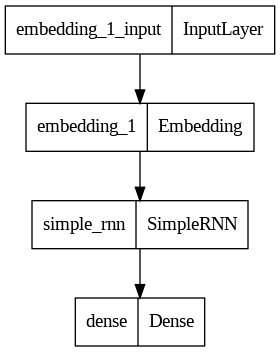

In [20]:
from keras.utils import plot_model
plot_model(model)

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 60s 73ms/step - loss: 0.6324 - acc: 0.6141 - val_loss: 0.5117 - val_acc: 0.7554
Epoch 2/5
782/782 [==============================] - 41s 52ms/step - loss: 0.4728 - acc: 0.7776 - val_loss: 0.4593 - val_acc: 0.7848
Epoch 3/5
782/782 [==============================] - 41s 53ms/step - loss: 0.4485 - acc: 0.7930 - val_loss: 0.5169 - val_acc: 0.7430
Epoch 4/5
782/782 [==============================] - 40s 51ms/step - loss: 0.4443 - acc: 0.7954 - val_loss: 0.4582 - val_acc: 0.7854
Epoch 5/5
782/782 [==============================] - 39s 50ms/step - loss: 0.4408 - acc: 0.8000 - val_loss: 0.4605 - val_acc: 0.7852
